# Assembly Algorithms: My Analysis


> "The problem of sequence assembly can be compared to taking many copies of a book, passing each of them through a shredder with a different cutter, and piecing the text of the book back together just by looking at the shredded pieces. Besides the obvious difficulty of this task, there are some extra practical issues: the original may have many repeated paragraphs, and some shreds may be modified during shredding to have typos. Excerpts from another book may also be added in, and some shreds may be completely unrecognizable."

https://en.wikipedia.org/wiki/Sequence_assembly

In [12]:
from Py.overlap import overlap

from Py.de_bruijn_ize import de_bruijn_ize

#from Py.pick_maximal_overlap import pick_maximal_overlap

#from Py.scs import scs

#from Py.greedy_scs import greedy_scs

from Py.visualize_de_bruijn import visualize_de_bruijn

#### What is the shortest common superstring? 

In [13]:
from itertools import permutations

""" aka, the BRUTE FORCE VERSION """

""" Returns shortest common superstring of given
    strings, which must be the same length """

def scs ( ss ) :
    
    shortest_sup = None
    
    for ssperm in permutations ( ss ) :
        
        sup = ssperm [ 0 ]  # superstring starts as first string
        
        for i in range ( len ( ss ) - 1 ) :
            
            # overlap adjacent strings A and B in the permutation
            
            olen = overlap ( ssperm [ i ], ssperm [ i + 1 ], min_length = 1 )
            
            # add non-overlapping portion of B to superstring
            
            sup += ssperm [ i + 1 ] [olen : ]
            
        if shortest_sup is None or len ( sup ) < len ( shortest_sup ) :
            
            shortest_sup = sup  # found shorter superstring
            
    return shortest_sup  # return shortest

In [14]:
ss = [ "CCT", "CTT", "TGC", "TGG", "GAT", "ATT" ]

In [15]:
?ss

Type:        list
String form: ['CCT', 'CTT', 'TGC', 'TGG', 'GAT', 'ATT']
Length:      6
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

In [16]:
print ( "Shortest common superstring:", scs ( ss ) )

Shortest common superstring: CCTTGGATTGC


In [17]:
print ( "Length of the scs for the set of strings, ss: ", len ( scs ( ss ) ) )

Length of the scs for the set of strings, ss:  11


#### There can be more than one shortest common superstring (SCS). 

In [18]:

""" LIST VERSION OF SCS ( ) - BRUTE FORCE """

def scsList ( ss ) : 
    
    import itertools

    from Py.overlap import overlap

    """ Returns shortest common superstring of given strings,
        assuming no string is a strict substring of another """

    shortest_sup = None

    """ Initializing an empty list for our strings that are tied for scs """
    
    supList = list ()

    for ssperm in itertools.permutations ( ss ) :

        sup = ssperm [ 0 ]

        for i in range ( len ( ss ) - 1 ) :

            olen = overlap ( ssperm [ i ], ssperm [ i + 1 ], min_length = 1 )

            sup += ssperm [ i + 1 ] [ olen : ]


        if shortest_sup is None or len ( sup ) < len ( shortest_sup ) :

            shortest_sup = sup

        # Appending all superstrings as they are found before filitering out 
        # the longer ones below.
        
        supList . append ( sup )

    """ Initializing our filtered list of strings that are tied for having the
     shortest possible length. We took advantage of the above code, which
     will have the true shortest scs by the time it has finished looping through 
     all of the superstring permutations (ssperm).
     
     
     We then just take the length of the string still held in the variable 
     shortest_sup, to filter out strings that have greater lengths. """

    scslist = list () 

    for s in range ( len ( supList ) - 1 ) : 

        if  not ( len ( supList [ s ] ) > len ( shortest_sup ) )  :

            scslist . append ( supList [ s ] )
    
    return scslist

In [19]:
reads = [ "CCT", "CTT", "TGC", "TGG", "GAT", "ATT" ]

In [20]:
print ( "All scs' in the above input strings:\n ", scsList ( reads ) )

All scs' in the above input strings:
  ['CCTTGGATTGC', 'TGCCTTGGATT', 'TGGATTGCCTT', 'GATTGCCTTGG']


In [21]:
print ( "Count of strings that are tied for the shortest common superstring:",
      len ( scsList ( reads ) ) )

Count of strings that are tied for the shortest common superstring: 4


### How many A's are there in a fully assembled genome?

In [22]:
from itertools import permutations
from Py.overlap import overlap


""""This is a helper function for the greedy_scs() function"""

""" UNMODIFIED """

def pick_maximal_overlap ( reads, k ) :
    
    """ Return a pair of reads from the list with a
        maximal suffix/prefix overlap >= k.  Returns
        overlap length 0 if there are no such overlaps."""
        
    reada, readb = None, None
    
    best_olen = 0
    
    for a, b in permutations ( reads, 2 ) :
                    
        olen = overlap ( a, b, min_length = k )

        if olen > best_olen :

            reada, readb = a, b

            best_olen = olen

    return reada, readb, best_olen

In [23]:
from collections import defaultdict

""" A K-mer/reads dictionary function. 

All k-mers are unique and reads are grouped as a set. The purpose is to improve
 overlap function speed for large sets of reads. """

def kmerdict ( reads, k ) :
    
    kdict = defaultdict ( set )

    for read in reads : 

        for i in range ( 0, len ( read ) - k + 1 ) :

            kdict [ read [ i : i + k ] ] . add ( read )

    return kdict

In [24]:
def greedy_scs ( reads, k ) :
    
    """ Greedy shortest-common-superstring merge.
        Repeat until no edges (overlaps of length >= k)
        remain. """
        
    read_a, read_b, olen = pick_maximal_overlap ( reads, k )
    
    while olen > 0 :
        
        # Removes the separate reads
        
        reads . remove ( read_a )
        
        reads . remove ( read_b )
        
        # Adds them back as one concatenated prefix/suffix 
        
        # The entire length of read_a represents the prefix
        
        # Suffix read_b is sliced starting at index = olen to the end 
        
        reads . append ( read_a + read_b [ olen : ] )
        
        
        read_a, read_b, olen = pick_maximal_overlap ( reads, k )
        
    return '' . join ( reads )

In [25]:
from itertools import permutations
from Py.overlap import overlap


""""This is a helper function for the greedy_scs() function"""

""" MODIFIED VERSION """

def pick_maximal_overlap_faster ( reads, k ) :
    
    """ Return a pair of reads from the list with a
        maximal suffix/prefix overlap >= k.  Returns
        overlap length 0 if there are no such overlaps."""
        
    reada, readb = None, None
    
    best_olen = 0
    
    """ 
    
    Speeding things along with a kmer-indexed dictionary of unique 
    k-mers and the corresponding sets of k-mer containing reads 
    
    key, unique kmer string
    value, corresponding set of all reads where that kmer can be found 
    
    """
    
    kmers = kmerdict ( reads, k )
    
    # Extracting the suffixes of reads
    
    for a in reads : 
            
        asfx = a [ - k : ]

        # Quickly finds all reads for that extracted suffix 
        # from the kmer dictionary
        
        for b in kmers [ asfx ] :

            # We don't want to match a read with itself
            
            if ( b != a ) :
            
                # Overlap length of two reads by at least k length characters
                
                olen = overlap ( a, b, min_length = k )

                # Can be greater or equal to the best overlap length
                
                """
                
                Finding the max prefix/suffix overlap length
                helps make the algorithm more efficient by using 
                the largest pieces possible.
                
                """
                # Updates the best overlap length if a longer olen is discovered.
                
                if olen >= best_olen :

                    reada, readb = a, b

                    best_olen = olen

    return reada, readb, best_olen

In [26]:
def greedy_scs_faster ( reads, k ) :
    
    """ Greedy shortest-common-superstring merge.
        Repeat until no edges (overlaps of length >= k)
        remain. """
        
    """ ( slightly ) MODIFIED VERSION """
    
    read_a, read_b, olen = pick_maximal_overlap ( reads, k )
    
    while olen > 0 :
        
        reads . remove ( read_a )
        
        reads . remove ( read_b )
        
        reads . append ( read_a + read_b [ olen : ] )
        
        """ The only change is that we use a modified pick_maximal_overlap 
        that is better sited to assembling large read files, such as 
        entire genome sequence. """
        
        read_a, read_b, olen = pick_maximal_overlap_faster ( reads, k ) 
        
    return '' . join ( reads )

In [27]:
%%time 

reads = ['GAT', 'TAG', 'TCG', 'TGC', 'AAT', 'ATA']

res = greedy_scs ( reads , k = 2 )

res, len ( res )

CPU times: total: 0 ns
Wall time: 0 ns


('TCGTGCAATGATAG', 14)

In [28]:
%%time 

reads = ['GAT', 'TAG', 'TCG', 'TGC', 'AAT', 'ATA']

res = greedy_scs_faster ( reads , k = 2 )

res, len ( res )

CPU times: total: 0 ns
Wall time: 0 ns


('TCGTGCAATGATAG', 14)

In [29]:
%%time

from Py.geneReader_Q import geneReader_Q

filename = "SeqFiles/ads1_week4_reads.fq"

reads = geneReader_Q ( filename )

assembled_genome = greedy_scs_faster ( reads , k = 30 )

?assembled_genome

CPU times: total: 53.2 s
Wall time: 53.7 s


Type:        str
String form: ACCAAACAAAGTTGGGTAAGGATAGATCAATCAATGATCATATTCTAGTACACTTAGGATTCAAGATCCTATTATCAGGGACAAGAGCAGGATTAGG <...> CGGAACCCTAATCCTGCCCTAGGTAGTTAGGCATTATTTGCAATATATTAAAGAAAACTTTGAAAATACGAAGTTTCTATTCCCAGCTTTGTCTGGT
Length:      15894
Docstring:  
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.

In [30]:
print ( " Length of the assembled genome: ", len ( assembled_genome ) )

 Length of the assembled genome:  15894


In [31]:
print ( "Number of A's in the assembled genome: ", assembled_genome . count ( "A" ) )

Number of A's in the assembled genome:  4633


In [32]:
print ( "Number of T's in the assembled genome: ", assembled_genome . count ( "T" ) )

Number of T's in the assembled genome:  3723


In [33]:
def de_bruijn_ize ( st, k ) :
    
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
        
    edges = [ ]
    
    nodes = set ()
    
    for i in range ( len ( st ) - k + 1 ) :
        
        edges . append ( ( st [ i : i + k - 1 ], st [ i + 1 : i + k ] ) )
        
        nodes . add ( st [ i : i + k - 1 ] )
        
        nodes . add ( st [ i + 1 : i + k ] )
        
    return nodes, edges

In [40]:
reads = ['GAT', 'TAG', 'TCG', 'TGC', 'AAT', 'ATA']

k = 3

st = greedy_scs_faster ( reads , k = 3 )

st

'GATTAGTCGTGCAATATA'

In [41]:
nodes, edges = de_bruijn_ize ( st, 3 )

nodes

{'AA', 'AG', 'AT', 'CA', 'CG', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'TT'}

In [42]:
edges

[('GA', 'AT'),
 ('AT', 'TT'),
 ('TT', 'TA'),
 ('TA', 'AG'),
 ('AG', 'GT'),
 ('GT', 'TC'),
 ('TC', 'CG'),
 ('CG', 'GT'),
 ('GT', 'TG'),
 ('TG', 'GC'),
 ('GC', 'CA'),
 ('CA', 'AA'),
 ('AA', 'AT'),
 ('AT', 'TA'),
 ('TA', 'AT'),
 ('AT', 'TA')]

In [47]:
import graphviz

def visualize_de_bruijn ( st, k ) :
    
    nodes, edges = de_bruijn_ize ( st, k ) 
    
    dot = graphviz . Digraph ( comment = '' )
    
    for node in nodes :
        
        dot . node ( node )
        
    # starting edge to destination point
        
    for src, dst in edges :
        
        dot . edge ( src, dst )
        
    return dot

viz = visualize_de_bruijn ( st, 3 )

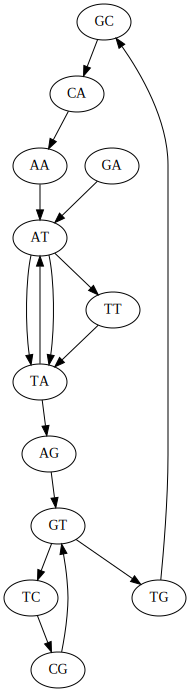

In [48]:
viz